# Function transformer :-  Log transform | Reciprocal transform | Square root transform

In [1]:
import pandas as pd
import numpy as np

In [10]:
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r'C:\Users\AmiteshOP\Downloads\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df=df[['Survived','Age','Fare']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df['Age'].fillna(df.Age.mean(),inplace=True)

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
y= df['Survived']
X= df.drop('Survived',axis=1)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

In [18]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


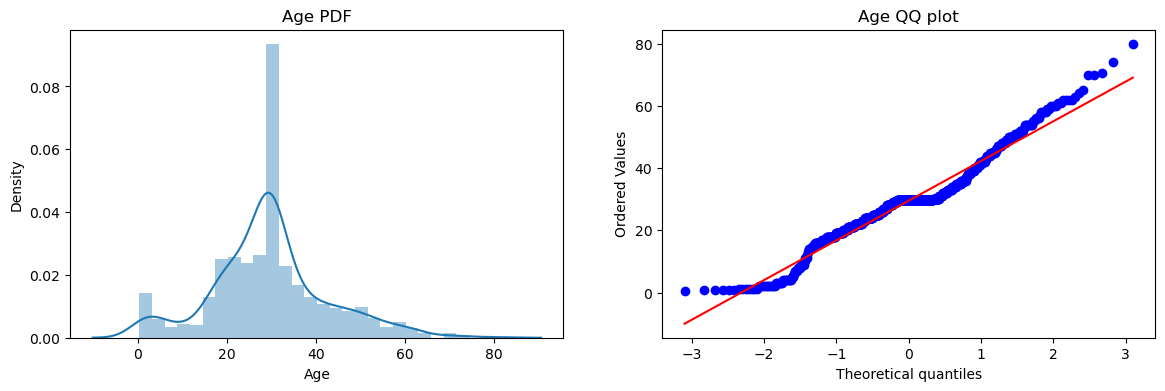

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Age QQ plot');

C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


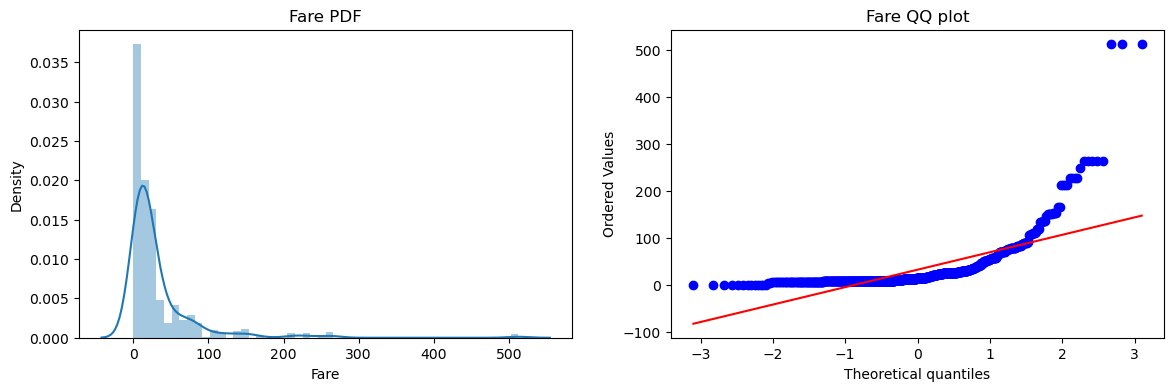

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Fare QQ plot');

In [26]:
lr = LogisticRegression()
tc=DecisionTreeClassifier()

In [32]:
lr.fit(X_train,y_train)
tc.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_pred1 = tc.predict(X_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy TC',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy TC 0.6815642458100558


In [36]:
ft = FunctionTransformer(func=np.log1p)

X_train_transformed=ft.fit_transform(X_train)
X_test_transformed=ft.fit_transform(X_test)

In [41]:
lr = LogisticRegression()
tc=DecisionTreeClassifier()

lr.fit(X_train_transformed,y_train)
tc.fit(X_train_transformed,y_train)

y_pred = lr.predict(X_test_transformed)
y_pred1 = tc.predict(X_test_transformed)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy TC',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy TC 0.6815642458100558


In [49]:
X_transformed = ft.fit_transform(X)

lr = LogisticRegression()
tc=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print('TC',np.mean(cross_val_score(tc,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
TC 0.6655555555555557


In [57]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [58]:
lr = LogisticRegression()
tc=DecisionTreeClassifier()

lr.fit(X_train_transformed2,y_train)
tc.fit(X_train_transformed2,y_train)

y_pred = lr.predict(X_test_transformed2)
y_pred1 = tc.predict(X_test_transformed2)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy TC',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy TC 0.6871508379888268


In [59]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


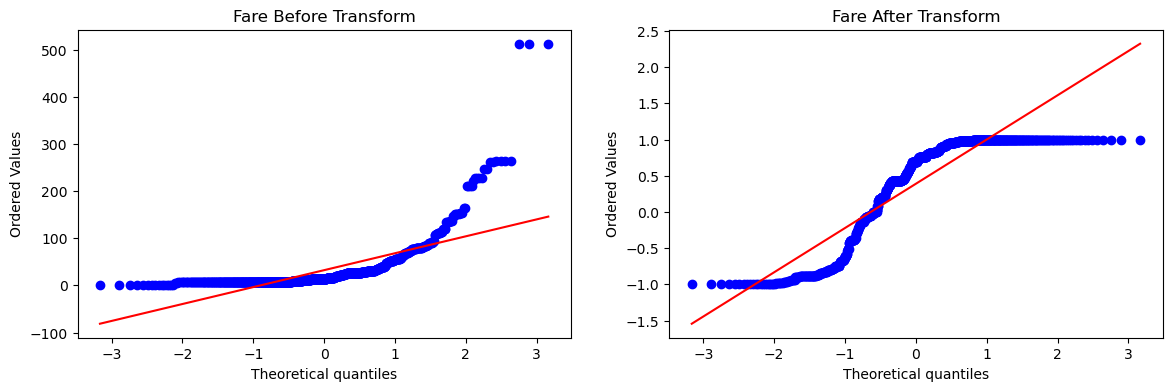

In [60]:
apply_transform(np.sin)